In [21]:
import hashlib
import numpy as np
import cv2


In [33]:
!pip install matplotlib


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 6.5 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 1.3 MB/s eta 0:00:00a 0:00:010m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 2.5 MB/s eta 0:00:00a 0:00:01
  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)
  Using cached pyparsing-3.0.9-py3-none-any.whl (98 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 300.3/300.3 kB 1.1 MB/s eta 0:00:0000:0100:01

[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python -m pip install --upgrade pip


In [23]:
import hashlib
import numpy as np
import cv2

city_labels = [
    ('road', 0, (128, 64, 128)),
    ('sidewalk', 1, (244, 35, 232)),
    ('building', 2, (70, 70, 70)),
    ('wall', 3, (102, 102, 156)),
    ('fence', 4, (190, 153, 153)),
    ('pole', 5, (153, 153, 153)),
    ('traffic light', 6, (250, 170, 30)),
    ('traffic sign', 7, (220, 220, 0)),
    ('vegetation', 8, (107, 142, 35)),
    ('terrain', 9, (152, 251, 152)),
    ('sky', 10, (70, 130, 180)),
    ('person', 11, (220, 20, 60)),
    ('rider', 12, (255, 0, 0)),
    ('car', 13, (0, 0, 142)),
    ('truck', 14, (0, 0, 70)),
    ('bus', 15, (0, 60, 100)),
    ('train', 16, (0, 80, 100)),
    ('motorcycle', 17, (0, 0, 230)),
    ('bicycle', 18, (119, 11, 32)),
    ('void', 19, (0, 0, 0)),
    ('void', 255, (0, 0, 0))
]


def sha256num(num):
    hex = hashlib.sha256(str(num).encode('utf-8')).hexdigest()
    hex = hex[-6:]
    return int(hex, 16)


def id2rgb(id_map):
    if isinstance(id_map, np.ndarray):
        id_map_copy = id_map.copy()
        rgb_shape = tuple(list(id_map.shape) + [3])
        rgb_map = np.zeros(rgb_shape, dtype=np.uint8)
        for i in range(3):
            rgb_map[..., i] = id_map_copy % 256
            id_map_copy //= 256
        return rgb_map
    color = []
    for _ in range(3):
        color.append(id_map % 256)
        id_map //= 256
    return color


def cityscapes_cat2rgb(cat_map):
    color_map = np.zeros_like(cat_map).astype(np.uint8)
    color_map = color_map[..., None].repeat(3, axis=-1)
    for each_class in city_labels:
        index = cat_map == each_class[1]
        if index.any():
            color_map[index] = each_class[2]
    return color_map


def trackmap2rgb(track_map):
    color_map = np.zeros_like(track_map).astype(np.uint8)
    color_map = color_map[..., None].repeat(3, axis=-1)
    for id_cur in np.unique(track_map):
        if id_cur == 0:
            continue
        color_map[track_map == id_cur] = id2rgb(sha256num(id_cur))
    return color_map


def draw_bbox_on_img(vis_img, bboxes):
    for index in range(bboxes.shape[0]):
        cv2.rectangle(vis_img, (int(bboxes[index][0]), int(bboxes[index][1])),
                      (int(bboxes[index][2]), int(bboxes[index][3])), (0, 0, 255), thickness=1)
    return vis_img


In [12]:
import os
os.chdir("/workspace/minini")

In [13]:
os.getcwd()

'/workspace/minini'

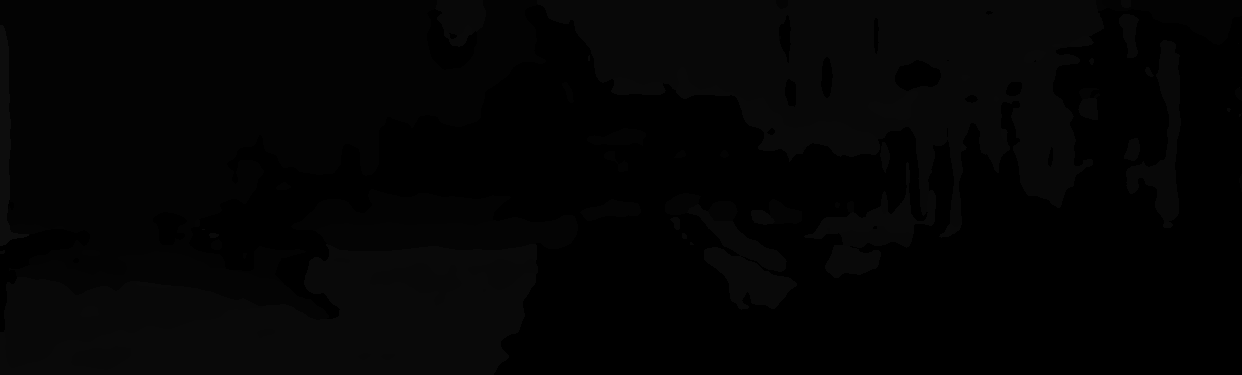

In [15]:
from PIL import Image

image = Image.open('Video-K-Net/risultati_predictions/panoptic/13/000013_000000_cat.png')
image.show()

In [34]:
import matplotlib.pyplot as plt

In [43]:
cityscapes_cat2rgb(np.array(image)).shape

(375, 1242, 3)

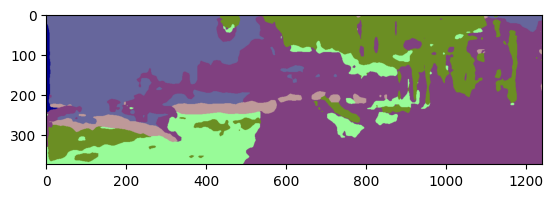

In [35]:
plt.imshow(cityscapes_cat2rgb(np.array(image)))

In [59]:
ground_truth = Image.open("Video-K-Net/data/kitti-step/video_sequence/train/000000_000013_panoptic.png")

In [64]:
np.array(ground_truth).shape

(375, 1242, 3)

In [61]:
ground_truth.shape

AttributeError: shape

In [45]:
a = cityscapes_cat2rgb(np.array(ground_truth))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


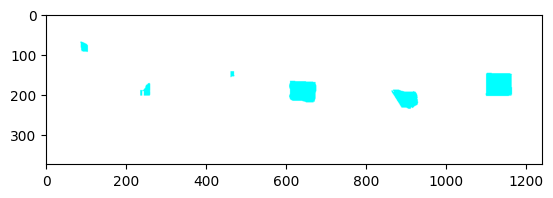

In [58]:
plt.imshow(a.mean(axis = 3))